<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/Tablero_CIrcular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#Importamos las sig librerias:
import numpy as np #Para el cálculo numérico
import matplotlib.pyplot as plt  #Para la creación de gráficos y visualizaciones de datos
import random #permite generar números enteros, números de coma flotante, elegir elementos al azar de una secuencia
from fractions import Fraction #Para crear objetos a partir de enteros, números de punto flotante, decimales y cadenas

In [76]:
"""
Existe un tablero con cuatro sectores,  el 1er cuadrante es de color naranja, el segundo cuadrante es rojo, el tercer cuadrante es verde,
y el cuarto cuadrante es azul; luego, supongamos que tenemos este tablero con 4 sectores y lanzamos dos monedas y avanzamos ,
en sentido que giran las manesillas del reloj, avanzamos el numero de caras que salgan.

Si repetimos el procedimiento muchas veces, ¿son todos los sectores igual de probables , cuando pase mucho tiempo?
Los posibles estados en las monedas son : CC,CX,XC,XX , donde X=cruz y C=cara
Por teoria sabemos que las probabilidades de cada estado de las monedas:
P(CC)=1/4, P(CX)=1/4 , P(XC) =1/4, P(XX)=1/4

Luego de manera analitica resolvemos el problema:
X_n= A la probabilidad de estar en el sector NARANJA traz n lanzamientos
Y_n= A la probabilidad de estar en el sector AZUL traz n lanzamientos
Z_n= A la probabilidad de estar en el sector VERDE traz n lanzamientos
T_n= A la probabilidad de estar en el sector ROJO traz n lanzamientos

Despues se calcula X_1 como la propabilidad de naranja CON EL TEOREMA DE PROBABILIDAD TOTAL:
X_1= P(NARANJA)= p(NARANJA|NARANJA)*P(NARANJA)+p(NARANJA|AZUL)*P(AZUL)+p(NARANJA|VERDE)*P(VERDE)+p(NARANJA|ROJO)*P(ROJO)
X_1= P(NARANJA)= 1/4X_0+0Y_0+1/4Z_0+2/4T_0

Despues se calcula Y_1 como la propabilidad de azul CON EL TEOREMA DE PROBABILIDAD TOTAL:
Y_1= P(AZUL)= p(AZUL|NARANJA)*P(NARANJA)+p(AZUL|AZUL)*P(AZUL)+p(AZUL|VERDE)*P(VERDE)+p(AZUL|ROJO)*P(ROJO)
Y_1= P(AZUL)= (2/4X_0)+(1/4Y_0)+(0Z_0)+(1/4T_0)

Despues se calcula Z_1 como la propabilidad de verde CON EL TEOREMA DE PROBABILIDAD TOTAL:
Z_1= P(VERDE)= P(VERDE|NARANJA)*P(NARANJA)+p(VERDE|AZUL)*P(AZUL)+p(VERDE|VERDE)*P(VERDE)+p(VERDE|ROJO)*P(ROJO)
Z_1= P(VERDE)= (1/4X_0)+(2/4Y_0)+(1/4Z_0)+(0T_0)

Despues se calcula T_1 como la propabilidad de rojo CON EL TEOREMA DE PROBABILIDAD TOTAL:
T_1= P(ROJO)= P(ROJO|NARANJA)*P(NARANJA)+p(ROJO|AZUL)*P(AZUL)+p(ROJO|VERDE)*P(VERDE)+p(ROJO|ROJO)*P(ROJO
T_1= P(ROJO)= (0X_0)+(1/4Y_0)+(2/4Z_0)+(1/4T_0)

 PARA N=1
       X_1= [1/4X_0, 0Y_0, 1/4Z_0, 2/4T_0],
       Y_1= [2/4X_0, 1/4Y_0, 0Z_0, 1/4T_0],
       Z_1= [1/4X_0, 2/4Y_0, 1/4Z_0, 0T_0],
       T_1= [0X_0, 1/4Y_0, 2/4Z_0, 1/4T_0]

  EN GENERAL: [X_n]     [1/4, 0, 1/4, 2/4]* [X_n-1]
              [Y_n] =   [2/4, 1/4, 0, 1/4]* [Y_n-1]
              [Z_n]     [1/4, 2/4, 1/4, 0]* [Z_n-1]
              [T_n]     [0, 1/4, 2/4, 1/4]* [T_n-1]

 Simplificamos y tenemos que:
 X_n= A*X_n-1= A^2*X_n-2= ......= A^n* X_n-n

Para resolver el problema se debe calcular A^n donde A es una matriz de orden 4
donde la matriz A={(1/4 , 0, 1/4, 2/4), (2/4, 1/4, 0, 1/4),( 1/4, 2/4,1/4 , 0),(0, 1/4, 2/4, 1/4)
"""

'\nExiste un tablero con cuatro sectores,  el 1er cuadrante es de color naranja, el segundo cuadrante es rojo, el tercer cuadrante es verde,\ny el cuarto cuadrante es azul; luego, supongamos que tenemos este tablero con 4 sectores y lanzamos dos monedas y avanzamos , \nen sentido que giran las manesillas del reloj, avanzamos el numero de caras que salgan. \n\nSi repetimos el procedimiento muchas veces, ¿son todos los sectores igual de probables , cuando pase mucho tiempo?\nLos posibles estados en las monedas son : CC,CX,XC,XX , donde X=cruz y C=cara\nPor teoria sabemos que las probabilidades de cada estado de las monedas: \nP(CC)=1/4, P(CX)=1/4 , P(XC) =1/4, P(XX)=1/4 \n\nLuego de manera analitica resolvemos el problema:\nX_n= A la probabilidad de estar en el sector NARANJA traz n lanzamientos\nY_n= A la probabilidad de estar en el sector AZUL traz n lanzamientos\nZ_n= A la probabilidad de estar en el sector VERDE traz n lanzamientos\nT_n= A la probabilidad de estar en el sector ROJO t

In [77]:
class SimulacionTablero:
    def __init__(self):
        # Definir los sectores del tablero
        self.sectores = {
            0: "Naranja (Cuadrante 1)",
            1: "Rojo (Cuadrante 2)",
            2: "Verde (Cuadrante 3)",
            3: "Azul (Cuadrante 4)"
        }

        # Colores para visualización
        self.colores = ['orange', 'red', 'green', 'blue']

        # Estados de las monedas y sus probabilidades
        #C=CARA, X= CRUZ

        self.estados_monedas = ['CC', 'CX', 'XC', 'XX']
        self.prob_monedas = [1/4, 1/4, 1/4, 1/4]

        # Número de caras por estado
        self.caras_por_estado = {'CC': 2, 'CX': 1, 'XC': 1, 'XX': 0}

        # Matriz de transición A
        self.A = np.array([
            [1/4, 0, 1/4, 2/4],
            [2/4, 1/4, 0, 1/4],
            [1/4, 2/4, 1/4, 0],
            [0, 1/4, 2/4, 1/4]
        ])

In [78]:
def lanzar_monedas(self):
    #Simula el lanzamiento de dos monedas y retorna el estado
    estados = ['CC', 'CX', 'XC', 'XX']
    return random.choices(estados, weights=self.prob_monedas)[0]

def simular_movimiento(self, posicion_actual, n_simulaciones=1):
    #Simula n movimientos desde una posición actual
    posiciones = []
    pos = posicion_actual

    for _ in range(n_simulaciones):
        estado = self.lanzar_monedas()
        caras = self.caras_por_estado[estado]
        # Avanzar en sentido horario
        pos = (pos + caras) % 4
        posiciones.append(pos)

    return posiciones

# Agregar métodos a la clase
SimulacionTablero.lanzar_monedas = lanzar_monedas
SimulacionTablero.simular_movimiento = simular_movimiento


In [79]:
 def simulacion_monte_carlo(self, n_simulaciones=10000, posicion_inicial=0):
        """Ejecuta simulación Monte Carlo"""
        print(f"\n=== SIMULACIÓN MONTE CARLO ===")
        print(f"Número de simulaciones: {n_simulaciones}")
        print(f"Posición inicial: {self.sectores[posicion_inicial]}")

        posiciones = self.simular_movimiento(posicion_inicial, n_simulaciones)

        # Contar frecuencias
        frecuencias = [0, 0, 0, 0]
        for pos in posiciones:
            frecuencias[pos] += 1

        # Calcular probabilidades empíricas
        prob_empiricas = [f / n_simulaciones for f in frecuencias]

        print("\nResultados de la simulación:")
        for i in range(4):
            print(f"{self.sectores[i]}: {frecuencias[i]} veces ({prob_empiricas[i]:.4f})")

        return prob_empiricas, frecuencias

# Agregar método a la clase
SimulacionTablero.simulacion_monte_carlo = simulacion_monte_carlo


In [80]:
 def calcular_probabilidades_teoricas(self, n_pasos=100):
        #Calcula las probabilidades teóricas usando A^n
        print(f"\n=== CÁLCULO TEÓRICO ===")
        print("Matriz de transición A:")
        print(self.A)

        # Calcular A^n para n grande
        A_n = np.linalg.matrix_power(self.A, n_pasos)
        print(f"\nMatriz A^{n_pasos}:")
        print(A_n)

        # La distribución estacionaria es cualquier fila de A^n cuando n es grande
        prob_estacionaria = A_n[0]  # Tomamos la primera fila

        print(f"\nProbabilidades teóricas (estado estacionario):")
        for i in range(4):
            print(f"{self.sectores[i]}: {prob_estacionaria[i]:.6f}")

        return prob_estacionaria

# Agregar método a la clase
SimulacionTablero.calcular_probabilidades_teoricas = calcular_probabilidades_teoricas


In [81]:
 def calcular_distribucion_estacionaria_exacta(self):
        #Calcula la distribución estacionaria resolviendo πA = π
        #Ocupamos cadenas de Markov para esta parte
        print(f"\n=== DISTRIBUCIÓN ESTACIONARIA EXACTA ===")

        # Resolver el sistema πA = π, donde π es la distribución estacionaria
        # Esto es equivalente a resolver (A^T - I)π = 0 con la restricción Σπᵢ = 1

        # Crear el sistema de ecuaciones
        AT_minus_I = self.A.T - np.eye(4)

        # Reemplazar una ecuación por la restricción de suma = 1
        AT_minus_I[-1] = np.ones(4)
        b = np.zeros(4)
        b[-1] = 1

        # Resolver el sistema
        pi = np.linalg.solve(AT_minus_I, b)

        print("Distribución estacionaria exacta:")
        for i in range(4):
            # Convertir a fracción para mejor visualización
            frac = Fraction(pi[i]).limit_denominator(1000)
            print(f"{self.sectores[i]}: {pi[i]:.6f} ≈ {frac}")

        return pi

# Agregar método a la clase
SimulacionTablero.calcular_distribucion_estacionaria_exacta = calcular_distribucion_estacionaria_exacta


In [82]:
 def visualizar_resultados(self, prob_empiricas, prob_teoricas):
        """Crea gráficos comparativos"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        sectores_nombres = [f"Sector {i+1}" for i in range(4)]

        # Gráfico de barras para probabilidades empíricas
        bars1 = ax1.bar(sectores_nombres, prob_empiricas, color=self.colores, alpha=0.7)
        ax1.set_title('Probabilidades Empíricas (Simulación)')
        ax1.set_ylabel('Probabilidad')
        ax1.set_ylim(0, max(max(prob_empiricas), max(prob_teoricas)) * 1.1)

        # Agregar valores en las barras
        for bar, prob in zip(bars1, prob_empiricas):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{prob:.3f}', ha='center', va='bottom')

        # Gráfico de barras para probabilidades teóricas
        bars2 = ax2.bar(sectores_nombres, prob_teoricas, color=self.colores, alpha=0.7)
        ax2.set_title('Probabilidades Teóricas (Estado Estacionario)')
        ax2.set_ylabel('Probabilidad')
        ax2.set_ylim(0, max(max(prob_empiricas), max(prob_teoricas)) * 1.1)

        # Agregar valores en las barras
        for bar, prob in zip(bars2, prob_teoricas):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{prob:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

# Agregar método a la clase
SimulacionTablero.visualizar_resultados = visualizar_resultados


In [83]:
 def ejecutar_analisis_completo(self):
        """Ejecuta el análisis completo del problema"""
        print("="*60)
        print("SIMULACIÓN DE TABLERO CON CUATRO SECTORES Y DOS MONEDAS")
        print("="*60)

        # 1. Simulación Monte Carlo
        prob_empiricas, frecuencias = self.simulacion_monte_carlo(n_simulaciones=100000)

        # 2. Cálculo teórico
        prob_teoricas = self.calcular_probabilidades_teoricas(n_pasos=100)

        # 3. Distribución estacionaria exacta
        prob_exactas = self.calcular_distribucion_estacionaria_exacta()

        # 4. Comparación de resultados
        print(f"\n=== COMPARACIÓN DE RESULTADOS ===")
        print(f"{'Sector':<20} {'Empírica':<12} {'Teórica':<12} {'Exacta':<12} {'Diferencia':<12}")
        print("-" * 70)
        for i in range(4):
            diff = abs(prob_empiricas[i] - prob_exactas[i])
            print(f"{self.sectores[i]:<20} {prob_empiricas[i]:<12.6f} {prob_teoricas[i]:<12.6f} {prob_exactas[i]:<12.6f} {diff:<12.6f}")

        # 5. Respuesta a la pregunta principal
        print(f"\n=== RESPUESTA A LA PREGUNTA ===")
        print("¿Son todos los sectores igual de probables cuando pase mucho tiempo?")

        # Verificar si las probabilidades son iguales (con tolerancia)
        tolerancia = 0.001
        prob_iguales = all(abs(p - 0.25) < tolerancia for p in prob_exactas)

        if prob_iguales:
            print("SÍ: Todos los sectores tienen la misma probabilidad (≈ 0.25)")
        else:
            print("NO: Los sectores NO tienen la misma probabilidad")
            print("Las probabilidades en el estado estacionario son:")
            for i, prob in enumerate(prob_exactas):
                print(f"  - {self.sectores[i]}: {prob:.6f}")

        # 6. Visualización
        self.visualizar_resultados(prob_empiricas, prob_exactas)

# Agregar método a la clase
SimulacionTablero.ejecutar_analisis_completo = ejecutar_analisis_completo



 INICIANDO SIMULACIÓN...
SIMULACIÓN DE TABLERO CON CUATRO SECTORES Y DOS MONEDAS

=== SIMULACIÓN MONTE CARLO ===
Número de simulaciones: 100000
Posición inicial: Naranja (Cuadrante 1)

Resultados de la simulación:
Naranja (Cuadrante 1): 25048 veces (0.2505)
Rojo (Cuadrante 2): 24945 veces (0.2495)
Verde (Cuadrante 3): 25101 veces (0.2510)
Azul (Cuadrante 4): 24906 veces (0.2491)

=== CÁLCULO TEÓRICO ===
Matriz de transición A:
[[0.25 0.   0.25 0.5 ]
 [0.5  0.25 0.   0.25]
 [0.25 0.5  0.25 0.  ]
 [0.   0.25 0.5  0.25]]

Matriz A^100:
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]

Probabilidades teóricas (estado estacionario):
Naranja (Cuadrante 1): 0.250000
Rojo (Cuadrante 2): 0.250000
Verde (Cuadrante 3): 0.250000
Azul (Cuadrante 4): 0.250000

=== DISTRIBUCIÓN ESTACIONARIA EXACTA ===
Distribución estacionaria exacta:
Naranja (Cuadrante 1): 0.250000 ≈ 1/4
Rojo (Cuadrante 2): 0.250000 ≈ 1/4
Verde (Cuadrante 3): 0.250000 ≈ 1/4
Azul (Cuadrant

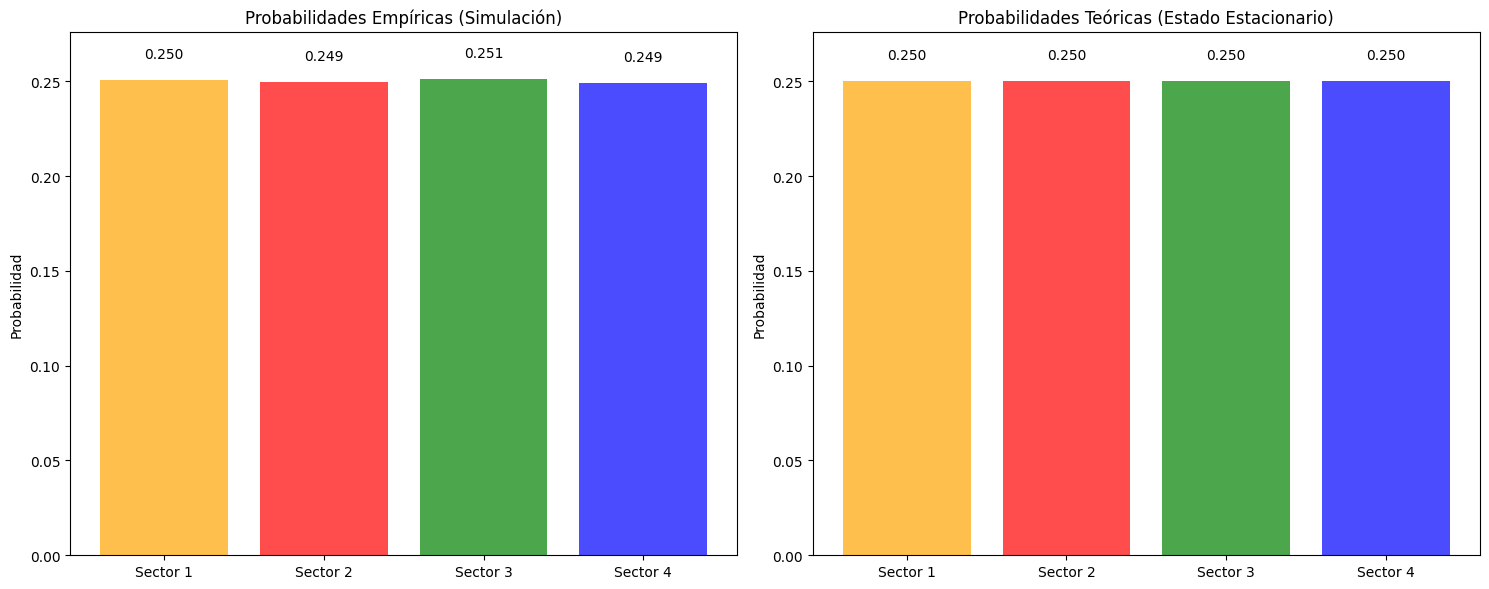

In [84]:
# Crear instancia y ejecutar análisis completo
print("\n INICIANDO SIMULACIÓN...")
print("="*60)

simulacion = SimulacionTablero()
simulacion.ejecutar_analisis_completo()